Importing all the dependencies

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# train_test_split - function that splits data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load data

In [2]:
# load data
raw_X = pd.read_csv('../datasets/hourly_wages_data.csv')
raw_Y = raw_X.pop('wage_per_hour')

Applying scaling

In [3]:
scaler = StandardScaler()
scaler.fit(raw_X)

raw_X = scaler.transform(raw_X)

Split data

In [4]:
# split data for train and test+val (0.1 + 0.2)
train_X, test_and_val_X, train_Y, test_and_val_Y = train_test_split(raw_X, raw_Y, test_size=0.3, random_state=1000)

# split data for test and val (0.2/0.3)
test_X, val_X, test_Y, val_Y = train_test_split(test_and_val_X, test_and_val_Y, test_size=0.66, random_state=1000)

Setup model

In [5]:
# setup model
model = tf.keras.Sequential()

n_cols = train_X.shape[1]

Define function for showing plot

In [6]:
def show_plot(history):
    plt.title("Model loss (mse)")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.plot(history.history['loss'], color='green')
    plt.plot(history.history['val_loss'], color='red')
    plt.legend(['Loss', 'Val loss'])
    plt.show()

Compile model with `adam` optimizer

In [7]:
# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

Print `adam`'s plot

In [8]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 6ms/step - loss: 105.7514 - val_loss: 114.6569
Epoch 2/150
10/10 [==============================] - 0s 1ms/step - loss: 95.4274 - val_loss: 103.8006
Epoch 3/150
10/10 [==============================] - 0s 1ms/step - loss: 85.0848 - val_loss: 91.8043
Epoch 4/150
 1/10 [==>...........................] - ETA: 0s - loss: 59.3510

2022-10-23 13:45:53.025545: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 1ms/step - loss: 73.6367 - val_loss: 78.5871
Epoch 5/150
10/10 [==============================] - 0s 1ms/step - loss: 61.5829 - val_loss: 64.3648
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 49.0738 - val_loss: 50.2359
Epoch 7/150
10/10 [==============================] - 0s 1ms/step - loss: 38.4624 - val_loss: 37.9321
Epoch 8/150
10/10 [==============================] - 0s 1ms/step - loss: 30.2105 - val_loss: 29.1861
Epoch 9/150
10/10 [==============================] - 0s 1ms/step - loss: 26.1610 - val_loss: 23.9775
Epoch 10/150
10/10 [==============================] - 0s 1ms/step - loss: 24.2215 - val_loss: 21.4288
Epoch 11/150
10/10 [==============================] - 0s 1ms/step - loss: 23.3607 - val_loss: 20.1211
Epoch 12/150
10/10 [==============================] - 0s 1ms/step - loss: 22.6536 - val_loss: 19.5286
Epoch 13/150
10/10 [==============================] - 0s 1ms/step - loss: 22.3068 - val_loss: 18.783

10/10 [==============================] - 0s 1ms/step - loss: 17.9830 - val_loss: 17.3163
Epoch 85/150
10/10 [==============================] - 0s 1ms/step - loss: 17.8597 - val_loss: 17.3647
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 17.8641 - val_loss: 17.0055
Epoch 87/150
10/10 [==============================] - 0s 1ms/step - loss: 17.8123 - val_loss: 17.0201
Epoch 88/150
10/10 [==============================] - 0s 1ms/step - loss: 17.7272 - val_loss: 16.9330
Epoch 89/150
10/10 [==============================] - 0s 1ms/step - loss: 17.7993 - val_loss: 16.5623
Epoch 90/150
10/10 [==============================] - 0s 1ms/step - loss: 17.6590 - val_loss: 16.8533
Epoch 91/150
10/10 [==============================] - 0s 2ms/step - loss: 17.7729 - val_loss: 17.2959
Epoch 92/150
10/10 [==============================] - 0s 1ms/step - loss: 17.5826 - val_loss: 17.1839
Epoch 93/150
10/10 [==============================] - 0s 1ms/step - loss: 17.6705 - val_loss: 1

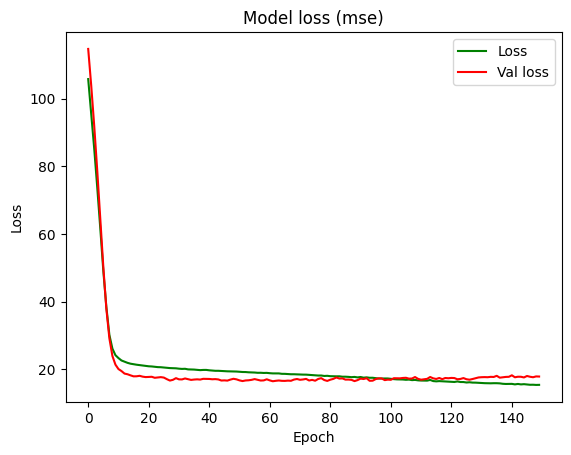

In [9]:
show_plot(history)

Compile model with `adadelta` optimizer

In [10]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(optimizer=tf.keras.optimizers.Adadelta(
    learning_rate=0.1
), loss='mean_squared_error')

Print `adadelta`'s plot

In [11]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 5ms/step - loss: 104.1576 - val_loss: 119.9231
Epoch 2/150
10/10 [==============================] - 0s 1ms/step - loss: 102.5073 - val_loss: 118.1309
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 100.8680 - val_loss: 116.3091
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 99.1922 - val_loss: 114.4927
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 97.5087 - val_loss: 112.5787
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 95.7417 - val_loss: 110.6588
Epoch 7/150
10/10 [==============================] - 0s 1ms/step - loss: 93.9460 - val_loss: 108.6110
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 92.0193 - val_loss: 106.4824
Epoch 9/150
10/10 [==============================] - 0s 1ms/step - loss: 90.0120 - val_loss: 104.1621
Epoch 10/150
10/10 [==============================] - 0s 1ms/step - loss: 87.83

10/10 [==============================] - 0s 1ms/step - loss: 20.5538 - val_loss: 17.4943
Epoch 82/150
10/10 [==============================] - 0s 1ms/step - loss: 20.5493 - val_loss: 17.5237
Epoch 83/150
10/10 [==============================] - 0s 1ms/step - loss: 20.5319 - val_loss: 17.4670
Epoch 84/150
10/10 [==============================] - 0s 1ms/step - loss: 20.5214 - val_loss: 17.4012
Epoch 85/150
10/10 [==============================] - 0s 1ms/step - loss: 20.5023 - val_loss: 17.3946
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 20.4726 - val_loss: 17.4069
Epoch 87/150
10/10 [==============================] - 0s 1ms/step - loss: 20.4525 - val_loss: 17.3481
Epoch 88/150
10/10 [==============================] - 0s 1ms/step - loss: 20.4414 - val_loss: 17.3860
Epoch 89/150
10/10 [==============================] - 0s 1ms/step - loss: 20.4266 - val_loss: 17.3833
Epoch 90/150
10/10 [==============================] - 0s 1ms/step - loss: 20.4105 - val_loss: 1

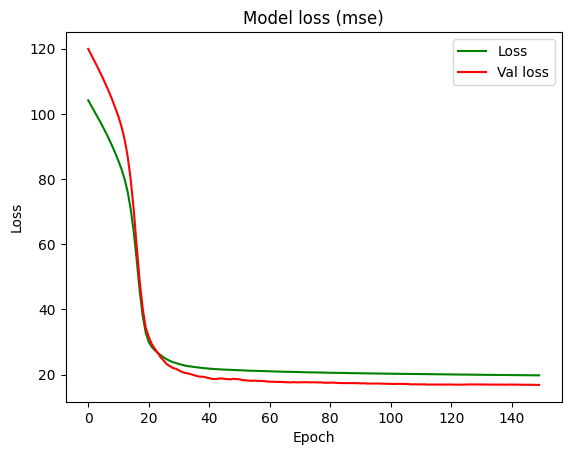

In [12]:
show_plot(history)

Compile model with `adagrad` optimizer

In [13]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=0.01
), loss='mean_squared_error')

Print `adagrad`'s plot

In [14]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 5ms/step - loss: 87.2435 - val_loss: 73.2320
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 51.3106 - val_loss: 44.2355
Epoch 3/150
10/10 [==============================] - 0s 1ms/step - loss: 33.2810 - val_loss: 28.9747
Epoch 4/150
10/10 [==============================] - 0s 1ms/step - loss: 26.0483 - val_loss: 22.1011
Epoch 5/150
10/10 [==============================] - 0s 1ms/step - loss: 23.6511 - val_loss: 20.1176
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 22.6240 - val_loss: 19.0315
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 22.1777 - val_loss: 19.0230
Epoch 8/150
10/10 [==============================] - 0s 1ms/step - loss: 21.8471 - val_loss: 18.7519
Epoch 9/150
10/10 [==============================] - 0s 1ms/step - loss: 21.5719 - val_loss: 18.5752
Epoch 10/150
10/10 [==============================] - 0s 8ms/step - loss: 21.4113 - val_los

10/10 [==============================] - 0s 1ms/step - loss: 18.2846 - val_loss: 17.1751
Epoch 82/150
10/10 [==============================] - 0s 1ms/step - loss: 18.3025 - val_loss: 16.9848
Epoch 83/150
10/10 [==============================] - 0s 1ms/step - loss: 18.2873 - val_loss: 17.0537
Epoch 84/150
10/10 [==============================] - 0s 1ms/step - loss: 18.3076 - val_loss: 17.1547
Epoch 85/150
10/10 [==============================] - 0s 1ms/step - loss: 18.2088 - val_loss: 17.2874
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 18.2315 - val_loss: 17.2412
Epoch 87/150
10/10 [==============================] - 0s 1ms/step - loss: 18.1963 - val_loss: 17.2274
Epoch 88/150
10/10 [==============================] - 0s 1ms/step - loss: 18.1667 - val_loss: 17.1690
Epoch 89/150
10/10 [==============================] - 0s 1ms/step - loss: 18.1566 - val_loss: 17.3974
Epoch 90/150
10/10 [==============================] - 0s 1ms/step - loss: 18.1382 - val_loss: 1

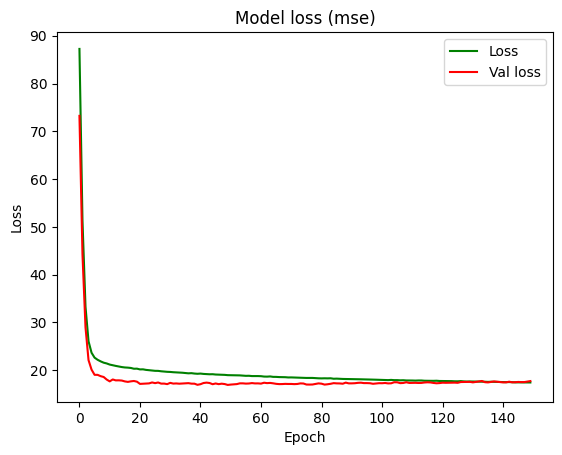

In [15]:
show_plot(history)

Compile model with `adamax` optimizer

In [48]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.001
), loss='mean_squared_error')

Print `adamax`'s plot

In [49]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=30)

Epoch 1/30
10/10 [==============================] - 0s 4ms/step - loss: 106.4164 - val_loss: 118.7827
Epoch 2/30
10/10 [==============================] - 0s 1ms/step - loss: 99.7491 - val_loss: 112.2727
Epoch 3/30
10/10 [==============================] - 0s 1ms/step - loss: 93.7810 - val_loss: 105.7893
Epoch 4/30
10/10 [==============================] - 0s 1ms/step - loss: 87.9323 - val_loss: 99.4539
Epoch 5/30
10/10 [==============================] - 0s 1ms/step - loss: 82.0818 - val_loss: 92.9837
Epoch 6/30
10/10 [==============================] - 0s 1ms/step - loss: 76.1731 - val_loss: 86.2641
Epoch 7/30
10/10 [==============================] - 0s 1ms/step - loss: 70.3324 - val_loss: 79.9160
Epoch 8/30
10/10 [==============================] - 0s 1ms/step - loss: 64.8220 - val_loss: 73.5957
Epoch 9/30
10/10 [==============================] - 0s 1ms/step - loss: 59.3292 - val_loss: 67.2382
Epoch 10/30
10/10 [==============================] - 0s 1ms/step - loss: 54.0663 - val_loss: 60.

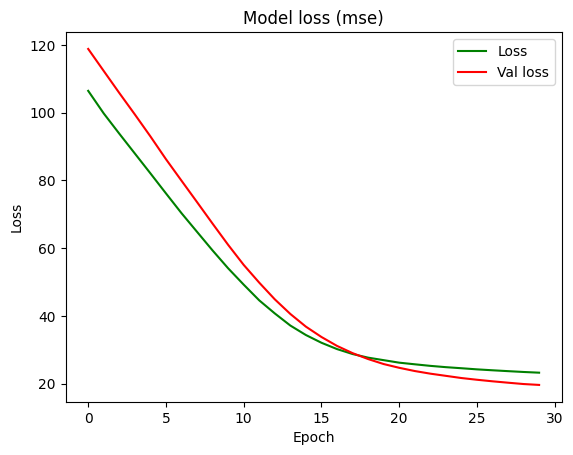

In [50]:
show_plot(history)

Compile model with `nadam` optimizer

In [36]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(optimizer=tf.keras.optimizers.Nadam(
    learning_rate=0.0001
), loss='mean_absolute_error')

Print `nadam`'s plot

In [37]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 4ms/step - loss: 9.0721 - val_loss: 10.0445
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 9.0261 - val_loss: 9.9957
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 8.9740 - val_loss: 9.9436
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 8.9197 - val_loss: 9.8906
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 8.8647 - val_loss: 9.8370
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 8.8087 - val_loss: 9.7827
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 8.7522 - val_loss: 9.7277
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 8.6949 - val_loss: 9.6718
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 8.6367 - val_loss: 9.6149
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 8.5777 - val_loss: 9.5569
Epoch 11

10/10 [==============================] - 0s 1ms/step - loss: 3.5962 - val_loss: 4.0953
Epoch 84/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5821 - val_loss: 4.0745
Epoch 85/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5696 - val_loss: 4.0538
Epoch 86/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5586 - val_loss: 4.0358
Epoch 87/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5472 - val_loss: 4.0175
Epoch 88/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5369 - val_loss: 3.9986
Epoch 89/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5264 - val_loss: 3.9807
Epoch 90/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5153 - val_loss: 3.9651
Epoch 91/500
10/10 [==============================] - 0s 1ms/step - loss: 3.5051 - val_loss: 3.9452
Epoch 92/500
10/10 [==============================] - 0s 1ms/step - loss: 3.4951 - val_loss: 3.9250
Epoch 93/500


10/10 [==============================] - 0s 1ms/step - loss: 3.1308 - val_loss: 3.2173
Epoch 165/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1290 - val_loss: 3.2117
Epoch 166/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1252 - val_loss: 3.2093
Epoch 167/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1218 - val_loss: 3.2056
Epoch 168/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1195 - val_loss: 3.2000
Epoch 169/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1165 - val_loss: 3.1965
Epoch 170/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1142 - val_loss: 3.1934
Epoch 171/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1117 - val_loss: 3.1916
Epoch 172/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1089 - val_loss: 3.1869
Epoch 173/500
10/10 [==============================] - 0s 1ms/step - loss: 3.1067 - val_loss: 3.1820
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 2.9613 - val_loss: 2.9716
Epoch 246/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9595 - val_loss: 2.9718
Epoch 247/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9590 - val_loss: 2.9710
Epoch 248/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9568 - val_loss: 2.9674
Epoch 249/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9554 - val_loss: 2.9639
Epoch 250/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9537 - val_loss: 2.9610
Epoch 251/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9521 - val_loss: 2.9574
Epoch 252/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9515 - val_loss: 2.9563
Epoch 253/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9490 - val_loss: 2.9556
Epoch 254/500
10/10 [==============================] - 0s 1ms/step - loss: 2.9480 - val_loss: 2.9541
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 2.8750 - val_loss: 2.9083
Epoch 327/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8737 - val_loss: 2.9103
Epoch 328/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8731 - val_loss: 2.9124
Epoch 329/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8722 - val_loss: 2.9111
Epoch 330/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8710 - val_loss: 2.9113
Epoch 331/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8699 - val_loss: 2.9130
Epoch 332/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8695 - val_loss: 2.9140
Epoch 333/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8691 - val_loss: 2.9149
Epoch 334/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8678 - val_loss: 2.9138
Epoch 335/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8673 - val_loss: 2.9140
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 2.8154 - val_loss: 2.9183
Epoch 408/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8137 - val_loss: 2.9203
Epoch 409/500
10/10 [==============================] - 0s 2ms/step - loss: 2.8133 - val_loss: 2.9213
Epoch 410/500
10/10 [==============================] - 0s 3ms/step - loss: 2.8121 - val_loss: 2.9192
Epoch 411/500
10/10 [==============================] - 0s 2ms/step - loss: 2.8122 - val_loss: 2.9205
Epoch 412/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8118 - val_loss: 2.9181
Epoch 413/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8105 - val_loss: 2.9186
Epoch 414/500
10/10 [==============================] - 0s 2ms/step - loss: 2.8098 - val_loss: 2.9206
Epoch 415/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8095 - val_loss: 2.9173
Epoch 416/500
10/10 [==============================] - 0s 1ms/step - loss: 2.8090 - val_loss: 2.9151
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 2.7635 - val_loss: 2.9066
Epoch 489/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7620 - val_loss: 2.9060
Epoch 490/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7617 - val_loss: 2.9102
Epoch 491/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7620 - val_loss: 2.9089
Epoch 492/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7605 - val_loss: 2.9043
Epoch 493/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7603 - val_loss: 2.9056
Epoch 494/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7594 - val_loss: 2.9070
Epoch 495/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7591 - val_loss: 2.9063
Epoch 496/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7588 - val_loss: 2.9076
Epoch 497/500
10/10 [==============================] - 0s 1ms/step - loss: 2.7580 - val_loss: 2.9065
Epoc

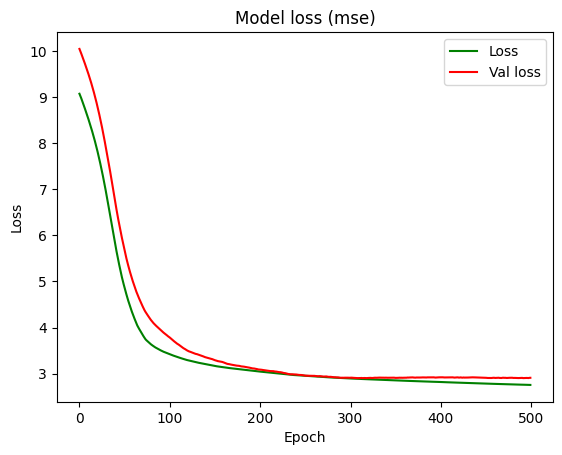

In [38]:
show_plot(history)

Compile model with `sgd` optimizer

In [30]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(15, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.001
), loss='mean_squared_error')


Print `sgd`'s plot

In [31]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=15)

Epoch 1/15
10/10 [==============================] - 0s 4ms/step - loss: 103.6539 - val_loss: 112.3183
Epoch 2/15
10/10 [==============================] - 0s 1ms/step - loss: 92.6379 - val_loss: 98.8140
Epoch 3/15
10/10 [==============================] - 0s 1ms/step - loss: 79.7720 - val_loss: 83.6660
Epoch 4/15
10/10 [==============================] - 0s 1ms/step - loss: 65.6795 - val_loss: 66.7393
Epoch 5/15
10/10 [==============================] - 0s 1ms/step - loss: 51.2236 - val_loss: 50.1205
Epoch 6/15
10/10 [==============================] - 0s 1ms/step - loss: 39.0109 - val_loss: 37.1543
Epoch 7/15
10/10 [==============================] - 0s 1ms/step - loss: 30.9838 - val_loss: 29.4900
Epoch 8/15
10/10 [==============================] - 0s 1ms/step - loss: 27.0767 - val_loss: 25.9061
Epoch 9/15
10/10 [==============================] - 0s 1ms/step - loss: 25.3436 - val_loss: 23.7157
Epoch 10/15
10/10 [==============================] - 0s 1ms/step - loss: 24.4014 - val_loss: 22.73

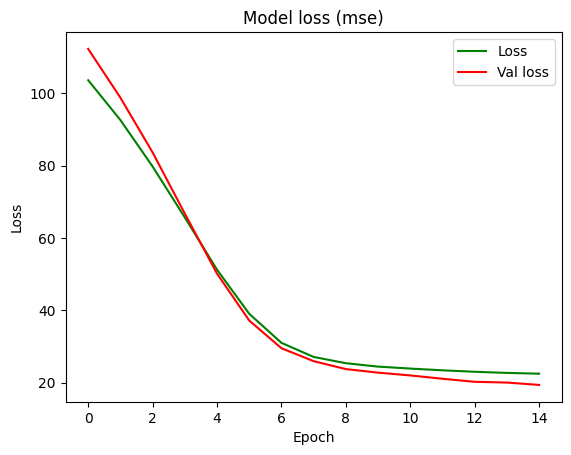

In [32]:
show_plot(history)
